# Logistic Regression on Microchip Data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

In [2]:
df = pd.read_csv('microchip-data.csv', header=None, names=['test1','test2','result'])
df = shuffle(df)
df.head()

,test1,test2,result
14,0.54666,0.48757,1
72,0.82892,-0.52120,0
28,-0.13882,0.54605,1
104,-0.15035,-0.36769,0
74,0.59274,-0.74050,0


In [3]:
df.shape

(118, 3)

In [4]:
Y = df['result']
X = df.drop(['result'],axis=1)

In [5]:
print(X.shape)
print(Y.shape)

(118, 2)
(118,)


## Data Preprocessing

In [6]:
Y = (np.array(Y)).reshape(Y.shape[0],1)
print(Y.shape)
X = np.array(X)
X = np.c_[np.ones(X.shape[0]),np.array(X)]
print(X.shape)

(118, 1)
(118, 3)


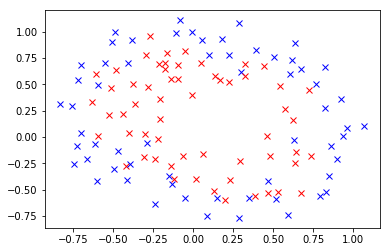

In [7]:
for i in range(X.shape[0]):
    if Y[i]==1:
        plt.plot(X[i,1],X[i,2],'rx')
    else:
        plt.plot(X[i,1],X[i,2],'bx')
plt.show()

In [8]:
# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(82, 3) (82, 1)
(36, 3) (36, 1)


In [9]:
#Normalising Inputs(2D input)
def normalise(inp):
    return np.array((inp-inp.mean())/inp.std())
X = normalise(X)

## Defining functions

In [10]:
# Sigmoid function
def sigmoid(z):
    return 1.0 / (1 + np.exp(-z))

In [11]:
# Cost Function with regularization
def cost(X,Y,theta,_lambda=0.1):
    m = len(Y)
    h = sigmoid(X.dot(theta))
    reg = (_lambda/(2 * m)) * np.sum(theta**2)
    return (1 / m) * (-Y.T.dot(np.log(h)) - (1 - Y).T.dot(np.log(1 - h))) + reg

In [12]:
# Regularized gradient function
def derivative(X,Y,theta,_lambda = 0.1):
    m, n = X.shape
    h = sigmoid(X.dot(theta))
    reg = _lambda * theta /m
    return ((1 / m) * X.T.dot(h - Y)) + reg

In [13]:
# Training function
def train(X, Y, alpha, iterations = 100000, _lambda=0.1):
    costs = np.empty([iterations])
    i = 0
    m = X.shape[0]
    theta = np.random.randn(X.shape[1],1)

    while i < iterations:
        costs[i] = cost(X, Y, theta, _lambda)
        theta = theta - (alpha / m) * (derivative(X, Y, theta, _lambda))
        i = i + 1
    return theta, costs

In [14]:
def test(X,Y,theta):
    pred = sigmoid(X.dot(theta))
    counts = 0
    a, b = X.shape
    for i in range(a):
        if pred[i] > 0.5:
            if int(Y[i]) == 1:
                counts = counts + 1
        else:
            if int(Y[i]) == 0 :
                counts = counts + 1
        
    print('Accuracy:',counts/a * 100)

## Training without Regularization (lambda = 0)

In [15]:
theta, costs = train(X_train, y_train, 0.05, _lambda=0)
print(theta)

[[-0.10435592]
 [-0.5438233 ]
 [ 0.16656105]]


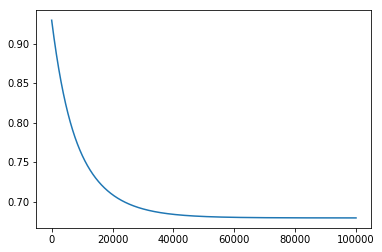

In [16]:
plt.plot(range(len(costs)),costs)

In [17]:
test(X_test,y_test,theta)

Accuracy: 47.22222222222222


## lambda = 0.1

In [18]:
theta, costs = train(X_train, y_train, 0.05, _lambda=0)
print(theta)

[[-0.10795917]
 [-0.55070798]
 [ 0.18339786]]


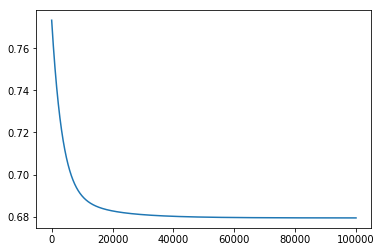

In [19]:
plt.plot(range(len(costs)),costs)

In [20]:
test(X_test,y_test,theta)

Accuracy: 47.22222222222222


# Addition of Non-linear features

In [21]:
# Adding non linear features
df['test1**2'] = df.apply (lambda row: row.test1 * row.test1, axis=1)
df['test2**2'] = df.apply (lambda row: row.test2 * row.test2, axis=1)
df.head()

,test1,test2,result,test1**2,test2**2
14,0.54666,0.48757,1,0.298837,0.237725
72,0.82892,-0.52120,0,0.687108,0.271649
28,-0.13882,0.54605,1,0.019271,0.298171
104,-0.15035,-0.36769,0,0.022605,0.135196
74,0.59274,-0.74050,0,0.351341,0.548340


In [22]:
Y = df['result']
X = df.drop(['result'],axis=1)

In [23]:
print(X.shape)
print(Y.shape)

(118, 4)
(118,)


In [24]:
Y = (np.array(Y)).reshape(Y.shape[0],1)
print(Y.shape)
X = np.array(X)
X = np.c_[np.ones(X.shape[0]),np.array(X)]
print(X.shape)
X = normalise(X)

(118, 1)
(118, 5)


In [25]:
# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(82, 5) (82, 1)
(36, 5) (36, 1)


In [26]:
theta, costs = train(X_train, y_train, 0.05, _lambda=0.1)
print(theta)

[[-0.23683709]
 [ 0.54715789]
 [ 0.71398527]
 [-2.76901115]
 [-2.51671882]]


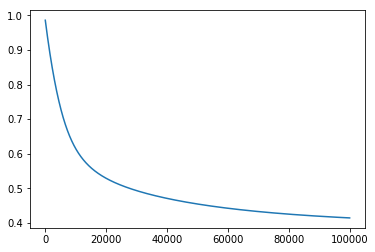

In [27]:
plt.plot(range(len(costs)),costs)

In [28]:
test(X_test,y_test,theta)

Accuracy: 72.22222222222221
